# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [124]:
def max_element(arr):
    kek = np.arange(len(arr))[arr==0]+1
    if kek[-1]==len(arr):
        kek=kek[:-1]
    if len(kek)>0:
        return max(arr[kek])
    else:
        return None

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [154]:
def nearest_value(dog, virginity):
    panin = abs(dog - virginity).argmin()
    return dog[(panin // dog.shape[1], panin % dog.shape[1])]

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [168]:
def scale(X):
    means = X.mean(0)
    stds = X.std(0)
    if 0 in stds:
        return "Error"
    return (X - means)/stds

In [185]:
# chek with random matrix 
mat = np.random.randint(low=10,size=(5,4))
print(mat)
scale(mat)

[[2 6 2 1]
 [0 4 8 3]
 [9 7 9 8]
 [8 8 8 9]
 [5 5 1 1]]


array([[-0.81649658,  0.        , -1.06436231, -0.98810493],
       [-1.39970842, -1.41421356,  0.70957488, -0.40686674],
       [ 1.22474487,  0.70710678,  1.00523107,  1.04622875],
       [ 0.93313895,  1.41421356,  0.70957488,  1.33684785],
       [ 0.05832118, -0.70710678, -1.36001851, -0.98810493]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [176]:
def get_stats(X):
    determ = np.linalg.det(X)
    t = X.trace()
    minelem = X.min()
    maxelem = X.max()
    frob = np.linalg.norm(X, 'fro')
    sobchis = np.linalg.eig(X)
    inverse = np.linalg.inv(X)
    return determ, t, minelem, maxelem, frob, sobchis[0], inverse

In [186]:
# check with matrix from Normal Distribution
norm = np.random.normal(size=(3,3))
print(norm)
get_stats(norm)

[[-1.36531749  0.03186368 -0.34826233]
 [ 1.51739399  1.59776679  0.95554682]
 [-0.76918663 -0.2199122  -0.74691283]]


(1.0433553319451274,
 -0.5144635299734347,
 -1.3653174861563191,
 1.5977667886552465,
 2.9921054402564957,
 array([ 1.53374681, -1.63116835, -0.41704199]),
 array([[-0.94239813,  0.09621509,  0.56250177],
        [ 0.38181355,  0.72065039,  0.7439207 ],
        [ 0.85808485, -0.31126413, -2.13715177]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [205]:
arr = []
for exp_num in range(100):
    X, Y = np.random.normal(size=(10,10)), np.random.normal(size=(10,10))
    arr.append(np.dot(X, Y).max())
print('Среднее равно: %s' % np.mean(arr))
print('95-процентная квантиль равна: %s' % np.percentile(arr,95)) 

Среднее равно: 8.4822240606
95-процентная квантиль равна: 11.8624605426


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


- Имеются ли в данных пропущенные значения?

In [7]:
if df.isnull().values.any() == True:
    print('да, пропуски есть')
else:
    print('нет, пропусков нет')

да, пропуски есть


- Сколько всего пропущенных элементов в таблице "объект-признак"?

In [15]:
print('количество пропусков: %s' % df.isnull().values.sum())

количество пропусков: 355215


- Сколько объектов имеют хотя бы один пропуск? (будем учитывать пропуски в целевой переменной)

In [31]:
print('количество объектов с хотя бы одним пропуском: %s' % df.isnull().values.any(axis=1).sum())

количество объектов с хотя бы одним пропуском: 70000


- Сколько признаков имеют хотя бы одно пропущенное значение? (будем учитывать целевую переменную)

In [32]:
print('количество признаков с хотя бы одним пропуском: %s' % df.isnull().values.any(axis=0).sum())

количество признаков с хотя бы одним пропуском: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

- Имеются ли пропущенные значения в целевой переменной?

In [41]:
target_null = df['DepDelay'].isnull().values
if target_null.any() == True:
    print('да, пропуски есть')
else:
    print('нет, пропусков нет')

да, пропуски есть


- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

In [112]:
a = round(100*len(df[target_null == True])/len(df),2)
print('процентная доля объектов с пропусками в DepDelay от всех объектов: %s ' % a)

процентная доля объектов с пропусками в DepDelay от всех объектов: 2.0 


In [92]:
df1 = df[target_null == True]
df2 = df[target_null == False]
print('Данные признаки содержат пропуски во всех объектах с пропуском в DepDelay \nи не содержат пропуски во всех объектах без пропуска в DepDelay:\n')
for i in df2.columns: 
    if i != 'DepDelay' and df1[i].isnull().values.all() == True and df2[i].isnull().values.any() == False:
        print(i)

Данные признаки содержат пропуски во всех объектах с пропуском в DepDelay 
и не содержат пропуски во всех объектах без пропуска в DepDelay:

DepTime


In [94]:
print('объекты с признаком DepDelay имеют идеальное сходство в следующих признаках:\n')
for i in df1.columns: 
    if len(df1[i].unique()) == 1 and set(df1[i].unique()) != set(df2[i].unique()):
        print('признак: %s, значение: %s'% (i, df1[i].unique()[0]))

объекты с признаком DepDelay имеют идеальное сходство в следующих признаках:

признак: DepTime, значение: nan
признак: ArrTime, значение: nan
признак: ActualElapsedTime, значение: nan
признак: AirTime, значение: nan
признак: ArrDelay, значение: nan
признак: DepDelay, значение: nan
признак: TaxiIn, значение: nan
признак: TaxiOut, значение: nan
признак: Cancelled, значение: 1
признак: Diverted, значение: 0
признак: CarrierDelay, значение: nan
признак: WeatherDelay, значение: nan
признак: NASDelay, значение: nan
признак: SecurityDelay, значение: nan
признак: LateAircraftDelay, значение: nan


**Выводы:** 
- пропуски в целевой переменной *DepDelay* (задержки рейса в минутах), которая рассчитывается как модуль разницы между запланированным и фактическим временем отправления рейса, обусловлены пропусками в фактическом времени отправления рейса *DepTime* 
- объекты с пропусками в целевой переменной *DepDelay* объединяет то, что для всех объектов рейс был отменён (переменная *Cancelled*=1), при этом место прибытия рейса изменено не было (переменная *Diverted*=0). Также имеются признаки, в которых у всех таких объектов есть пропуски (список см. выше)
- на основе результатов данного анализа признаки исключать нельзя, тк объекты с пропусками в целевой переменной *DepDelay* составляют всего 2% от всей выборки и в данных признаках может содержаться ценная информация для прогнозирования для объектов без пропусков

Исключите из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [252]:
df = df2[df2['DepDelay'] != 0]
target = df['DepDelay']
df= df.drop('DepDelay', axis=1)

In [253]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'Origin',
       'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [254]:
for i in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    df[i+'_Hour'],df[i+'_Minute'] =  df[i]//100, df[i]%100
    df = df.drop(i, axis=1)
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour',
       'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute',
       'CRSArrTime_Hour', 'CRSArrTime_Minute'],
      dtype='object')

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

- Необходимо исключить признак *DepTime* (или *CRSDepTime*), так как *DepDelay* является линейной комбинацией этих двух признаков. Но *DepTime* становится известен почти одновременно с целевой переменной, следовательно, нужно исключить именно этот признак.
- Необходимо исключить признак *ArrDelay*, так как *DepDelay* будет хорошо объясняться им (логика: насколько позже мы вылетели, настолько позже прилетим) + *ArrDelay* становится известен позже *DepDelay*. *ArrDelay*, в свою очередь, является линейной комбинацией *Arr_Time* и *CRSArrTime*. Поэтому по аналогии с *DepTime* ещё удалим *Arr_Time*. 
- *ActualElapsedTime* нужно удалить, так как он становится известен одновременно с задержкой рейса *DepDelay*. *CRSElapsedTime* (планируемая продолжительность полёта) стоит удалить, потому что она почти линейно будет зависеть от дистанции полёта *Distance* и времени в воздухе *AirTime*. *AirTime* также удалим из-за почти линейной связи с *Distance*.

In [358]:
import warnings
warnings.filterwarnings('ignore')

In [255]:
df = df.drop(['Year', 'TailNum'], axis=1)

In [261]:
print('Признаки, сильно коррелированные с целевой переменной:\n')
for i in df.columns:
    try:
        if abs(df[i].corr(target)) >= 0.8:
            print('%s: corr is %s'%(i, df[i].corr(target)))
    except TypeError:
        print('%s: corr is NaN'%i)
print('Other corrs are low')

Признаки, сильно коррелированные с целевой переменной:

UniqueCarrier: corr is NaN
ArrDelay: corr is 0.933525938482
Origin: corr is NaN
Dest: corr is NaN
CancellationCode: corr is NaN
Other corrs are low


Удалим признаки, сильно скоррелированные с DepDelay:

In [262]:
df = df.drop('ArrDelay',axis=1)

Удалим остальные выбранные признаки:

In [321]:
df3 = df.drop(['DepTime_Hour','DepTime_Minute','ArrTime_Hour','ArrTime_Minute',
            'ActualElapsedTime','CRSElapsedTime','AirTime'],axis=1)

In [322]:
df3.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CRSDepTime_Hour',
       'CRSDepTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute'],
      dtype='object')

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

In [290]:
per = 100 * df3.isnull().sum(axis=0) / len(df3)
print('процент пропусков в признаке:\n')
per

процент пропусков в признаке:



Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.220806
TaxiOut               0.011040
Cancelled             0.000000
CancellationCode     99.981074
Diverted              0.000000
CarrierDelay         76.553530
WeatherDelay         76.553530
NASDelay             76.553530
SecurityDelay        76.553530
LateAircraftDelay    76.553530
CRSDepTime_Hour       0.000000
CRSDepTime_Minute     0.000000
CRSArrTime_Hour       0.000000
CRSArrTime_Minute     0.000000
dtype: float64

Заметим, что признаки *CancellationCode*, *CarrierDelay*, *WeatherDelay*, *NASDelay*, *SecurityDelay*, *LateAircraftDelay* стоит удалить, так как процент пропущенных значений в них очень большой (превышает 75%). Признаки *TaxiIn* и *TaxiOut* являются вещественными, поэтому пропуски в них (которых малое количество) мы заполним средним. 

In [323]:
df4 = df3.drop(['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
                'LateAircraftDelay'], axis=1)

In [324]:
df4['TaxiIn'].fillna(df4['TaxiIn'].mean(), inplace = True)
df4['TaxiOut'].fillna(df4['TaxiOut'].mean(), inplace = True)

In [325]:
df4.shape

(63404, 16)

Теперь приведем данные к виду, пригодному для обучения линейных моделей: для этого сначала разделим признаки на категориальные и вещественные

In [366]:
numf=[i for i in df4.columns if df4[i].dtype.name!='object' and i not in ('Cancelled','Diverted')]
catf=[i for i in df4.columns if df4[i].dtype.name=='object' and i not in ('Cancelled','Diverted')]
binf = [i for i in ('Cancelled','Diverted')]

In [370]:
print(catf)
print(binf)

['UniqueCarrier', 'Origin', 'Dest']
['Cancelled', 'Diverted']


Масштабируем вещественные признаки с помощью написанной ранее функции:

In [368]:
df4[numf] = scale(df4[numf])

выведем количество категорий в каждом категориальном признаке

In [369]:
[{i:len(df4[i].unique())} for i in catf]

[{'UniqueCarrier': 20}, {'Origin': 296}, {'Dest': 298}]

One-hot Encoding приведет к возникновению новых (19+295+298) = 612 признаков, что очень много. Его реализации показана ниже в готовой функции.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [269]:
import matplotlib.pyplot as plt
%matplotlib inline

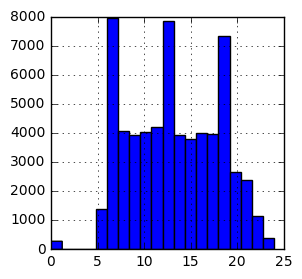

In [271]:
plt.figure(figsize=(3,3))
df['DepTime_Hour'].hist(bins=20)
plt.show()

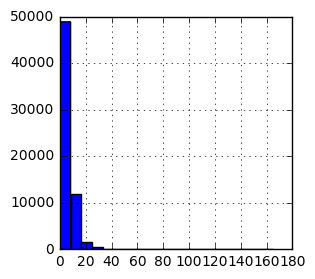

In [272]:
plt.figure(figsize=(3,3))
df['TaxiIn'].hist(bins=20)
plt.show()

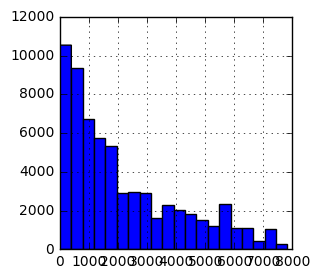

In [273]:
plt.figure(figsize=(3,3))
df['FlightNum'].hist(bins=20)
plt.show()

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

На гистограммах видно, что признаки обладают большим разбросом в значениях внутри самого признака, а также разные признаки обладают разным масштабом. Поэтому необходимо масштабировать признаки, чтобы сократить величину разброса, а также измерять все числовые признаки в стандартных отклонениях (чтобы признаки было удобно сравнивать между собой). 

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [330]:
from sklearn.preprocessing import StandardScaler

In [362]:
scaler = StandardScaler()
def transform_data(data):
    numf=[i for i in df4.columns if df4[i].dtype.name!='object' and i not in ('Cancelled','Diverted')]
    catf=[i for i in df4.columns if df4[i].dtype.name=='object' and i not in ('Cancelled','Diverted')]
    binf = [i for i in ('Cancelled','Diverted')]
    for i in numf:
        data[i].fillna(data[i].mean(), inplace = True)
        data[i] = scaler.fit_transform(data[i])
    for j in catf: 
        data[j].fillna('nan', inplace = True)
    data_catf = pd.get_dummies(data[catf])
    for k in binf:
        data[k].fillna('nan', inplace = True) 
    data = pd.concat((data[numf], data[binf], data_catf), axis=1)  
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [363]:
kekdf = transform_data(df3)

In [371]:
print('Количество признаков после преобразования:%s'%kekdf.shape[1])
kekdf.head()

Количество признаков после преобразования:627


,Month,DayofMonth,DayOfWeek,FlightNum,Distance,TaxiIn,TaxiOut,CRSDepTime_Hour,CRSDepTime_Minute,CRSArrTime_Hour,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.744130,-0.791728,-0.741449,1.512432,1.586498,1.725956,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,0.183961,-0.586761,-0.389973,0.214011,-0.936014,0.481702,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.471018,-0.586761,-0.653580,-0.435199,1.025940,0.066951,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.347886,-0.586761,0.225109,-0.435199,0.969884,-0.347800,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.634799,-0.586761,-0.741449,-1.084410,-0.375456,-0.347800,...,0,0,0,0,0,0,0,0,0,0


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [375]:
from sklearn.model_selection import train_test_split

In [377]:
X_train, X_test, y_train, y_test = train_test_split(kekdf, target, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [383]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

из документации по r2_score: 
- This is not a symmetric function.
- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
- example: r2_score(y_true, y_pred) = -3.0

In [382]:
X_trainred, y_trainred = X_train[:1000],y_train[:1000]

In [384]:
linreg = LinearRegression()
linreg.fit(X_trainred, y_trainred)
predtest = linreg.predict(X_test)
predtrain = linreg.predict(X_trainred)

In [385]:
print("Mean squared error on train: %.2f"
      % mean_squared_error(y_trainred, predtrain))
print('R2 score on train: %.2f' % r2_score(y_trainred, predtrain))
print("Mean squared error on test: %.2f"
      % mean_squared_error(y_test, predtest))
print('R2 score on test: %.2f' % r2_score(y_test, predtest))

Mean squared error on train: 678.02
R2 score on train: 0.36
Mean squared error on test: 42655900310282604396937216.00
R2 score on test: -31888233543269991055360.00


In [386]:
print('Coefficients: \n', linreg.coef_)

Coefficients: 
 [ -5.93046514e-01   8.11425861e-01   7.59047180e-01   1.26556466e+00
   6.21875788e-01   7.27336436e-01   4.98901400e+00   7.91379491e+00
  -6.24145149e-01  -1.38230807e+00   2.44450130e+00  -3.40478518e+14
  -1.07630840e+01   3.94798206e+13   3.94798206e+13  -3.99291547e+13
   3.94798206e+13   3.94798206e+13   3.94798206e+13   3.94798206e+13
   3.94798206e+13   3.94798206e+13   3.94798206e+13   3.94798206e+13
   3.94798206e+13   3.94798206e+13   3.94798206e+13   3.94798206e+13
   3.94798206e+13   3.94798206e+13   3.94798206e+13   3.94798206e+13
   3.94798206e+13  -6.55877194e+12   4.70852834e+12   4.70852834e+12
   4.70852834e+12  -2.09036322e+13   9.67936062e+11   4.70852834e+12
   8.95584565e+12   6.09229346e+12   1.81507155e+13   1.82504028e+13
   2.68758186e+12  -1.74242177e+13   4.70852834e+12  -2.08099289e+12
   1.36084879e+12   4.70852834e+12   4.70852834e+12   4.70852834e+12
   4.70852834e+12   4.70852834e+12   8.86219782e+12  -1.20465670e+13
  -6.90891078e+12 

**Выводы:**
- Значения MSE и R2 на тренировочной выборке являются приемлемыми, однако модель показывает крайне плохое качество на тестовой выборке (высокое значение MSE, отрицательный R2), что говорит о низкой прогнозной силе модели
- Это объясняется тем, что в модель включено очень много признаков (627 признаков на 1000 наблюдений) и все они используются в модели, это приводит к переобучению (что видно в огромной разнице между качеством модели на тренировочной и тестовой выборках, а также в огромных значениях весов, например 4.70852834e+12)

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [387]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

Lasso regression:

In [401]:
kf = KFold(n_splits=5,random_state=42)
alpha_grid = [0.1, 0.5, 0.1, 10.0, 50.0]
lasso = LassoCV(alphas=alpha_grid,cv=kf)

In [402]:
lasso.fit(X_trainred, y_trainred)
lassotest = lasso.predict(X_test)
lassotrain = lasso.predict(X_trainred)

In [403]:
print('значение параметра регуляризации: %s'%lasso.alpha_)
print('значения весов:')
lasso.coef_

значение параметра регуляризации: 0.5
значения весов:


array([-0.57850704,  0.07921026,  0.        ,  0.        ,  0.5072993 ,
        0.12263146,  3.2803331 ,  5.34724828,  0.        ,  0.        ,
        0.95664536,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  5.19116475, -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        1.43226292, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.  

In [404]:
print("Lasso, Mean squared error on train: %.2f"
      % mean_squared_error(y_trainred, lassotrain))
print('Lasso, R2 score on train: %.2f' % r2_score(y_trainred, lassotrain))
print("Lasso, Mean squared error on test: %.2f"
      % mean_squared_error(y_test, lassotest))
print('Lasso, R2 score on test: %.2f' % r2_score(y_test, lassotest))

Lasso, Mean squared error on train: 999.35
Lasso, R2 score on train: 0.06
Lasso, Mean squared error on test: 1304.79
Lasso, R2 score on test: 0.02


**Выводы**
- Lasso-регрессия занулила большинство коэффициентов, тем самым сделав отбор признаков и уменьшив их количество (что являлось проблемой прошлой модели)
- Модель после применения L1-регуляризации стала лучше, что проявляется в меньшем разбросе качества на обучающей и тестовой выборках (меньше переобучения), а так же в лучшем качестве на тестовой выборке (значение MSE ниже, R2 хоть и остался небольшим, но стал положительным)

Ridge regression:

In [420]:
alpha_grid = [70.0, 80.0,100.0,110.0,120.0]
ridge = RidgeCV(alphas=alpha_grid,cv=kf)

In [421]:
ridge.fit(X_trainred, y_trainred)
ridgetest = ridge.predict(X_test)
ridgetrain = ridge.predict(X_trainred)

In [422]:
print('значение параметра регуляризации: %s'%ridge.alpha_)
print('значения весов:')
ridge.coef_

значение параметра регуляризации: 100.0
значения весов:


array([ -9.22699352e-01,   5.72016559e-01,   1.29142906e-01,
         5.26254858e-01,   9.46681318e-01,   6.79375870e-01,
         3.55953611e+00,   5.16401012e+00,   1.58834328e-01,
         3.90911755e-01,   1.26268530e+00,   0.00000000e+00,
        -2.49449754e-01,  -1.42907237e+00,   1.06384362e+00,
         0.00000000e+00,  -1.45002259e+00,   1.29891332e+00,
         4.51313627e+00,  -1.54409703e+00,   1.24551146e+00,
        -4.09835391e-01,  -1.69119924e+00,  -9.33562817e-01,
        -2.01958966e+00,  -2.56610852e+00,   2.54798560e+00,
         4.08094790e-02,   2.00613128e+00,  -2.02558758e+00,
         3.07221202e+00,  -1.57753073e+00,  -1.41937096e-01,
         0.00000000e+00,   1.35314899e+00,  -3.28707824e-02,
         2.73964885e-01,   0.00000000e+00,   0.00000000e+00,
        -2.59740233e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -6.23204107e-02,   0.00000000e+00,
         0.00000000e+00,

In [423]:
print("Ridge, Mean squared error on train: %.2f"
      % mean_squared_error(y_trainred, ridgetrain))
print('Ridge, R2 score on train: %.2f' % r2_score(y_trainred, ridgetrain))
print("Ridge, Mean squared error on test: %.2f"
      % mean_squared_error(y_test, ridgetest))
print('Ridge, R2 score on test: %.2f' % r2_score(y_test, ridgetest))

Ridge, Mean squared error on train: 952.92
Ridge, R2 score on train: 0.10
Ridge, Mean squared error on test: 1295.90
Ridge, R2 score on test: 0.03


**Выводы:**
- Ridge-регрессия сократила значения коэффициентов, тем самым решив проблему прошлой модели
- Модель после применения L2-регуляризации стала лучше, что проявляется в меньшем разбросе качества на обучающей и тестовой выборках (меньше переобучения), а так же в лучшем качестве на тестовой выборке (значение MSE ниже, R2 хоть и остался небольшим, но стал положительным). Качество на тестовой выборке у L2-модели в целом лучше, чем у L-1 модели.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [430]:
X_train['const'] = 1
X_test['const'] = 1

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [431]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pred = np.dot(X,w)
    return pred
    pass

In [432]:
mat = np.random.randint(low=10,size=(5,4))
w = np.array([1,2,0,1])

In [453]:
make_pred(mat,w)

array([24, 31, 11, 10, 16])

In [443]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pred = np.dot(X,w)
    drob = (y - pred) / y
    summa = np.dot(drob, drob) / len(y)
    return summa
    pass

In [441]:
ykek = np.array([1.5,2,0.5,1,3.5])
get_func(w,mat,ykek)

200.00102040816327

In [450]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pred = np.dot(X,w) # X is matrix of shape lxd
    drob = (y - pred) / np.power(y,2) # vector of shape lx1
    grad = -2* np.dot(X.T, drob) / len(y)
    return grad
    pass

In [452]:
get_grad(w,mat,ykek)

array([  72.13265306,  133.5244898 ,  190.46530612,   74.04897959])

In [442]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pred = np.dot(X,w)
    drob = (y - pred) / y
    summa = np.dot(drob, drob) / len(y) + np.dot(w,w)
    return summa
    pass

In [454]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pred = np.dot(X,w) # X is matrix of shape lxd
    drob = (y - pred) / np.power(y,2) # vector of shape lx1
    grad = -2* np.dot(X.T, drob) / len(y) + 2 * w
    return grad
    pass

In [455]:
get_reg_grad(w,mat,ykek)

array([  74.13265306,  137.5244898 ,  190.46530612,   76.04897959])

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [493]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    if is_reg == False:
        mspe_arr = []
        w = w0 - step_size * get_grad(w0, X, y)
        mspe_arr.append(get_func(w, X, y))
        iteration = 2
        while iteration <= max_iter and np.linalg.norm(w-w0) >= eps:
            w0 = w
            w = w0 - step_size * get_grad(w0, X, y)
            mspe_arr.append(get_func(w, X, y))
            iteration += 1
    elif is_reg == True:
        mspe_arr = []
        w = w0 - step_size * get_grad(w0, X, y)
        mspe_arr.append(get_reg_func(w, X, y))
        iteration = 2
        while iteration <= max_iter and np.linalg.norm(w-w0) >= eps:
            w0 = w
            w = w0 - step_size * get_reg_grad(w0, X, y)
            mspe_arr.append(get_reg_func(w, X, y))
            iteration += 1
    return w, mspe_arr

In [497]:
grad_descent(mat, ykek, w, 0.01, 10, 0.001, False)

(array([ 0.08180387,  1.20819763, -0.78111289,  0.38309117]),
 [105.1778259932757,
  57.648840869358956,
  32.106849324151753,
  18.306549932409485,
  10.794367272087417,
  6.6602424668877065,
  4.3481099657001625,
  3.0242326251816869,
  2.2408775393128253,
  1.7568904477021103])

In [498]:
grad_descent(mat, ykek, w, 0.01, 10, 0.001, True)

(array([ 0.07786603,  1.02543535, -0.61750842,  0.33941105]),
 [109.39243307115991,
  63.868108669806801,
  38.010552664472826,
  23.214534578559391,
  14.672696753211834,
  9.6840533378206608,
  6.7246392169311271,
  4.9315523189893975,
  3.8145084393800381,
  3.0938383247883632])

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [500]:
# only 1000 to faster calculation
# X_trainred, y_trainred = X_train[:1000],y_train[:1000]
w0red = np.random.rand(X_trainred.shape[1])

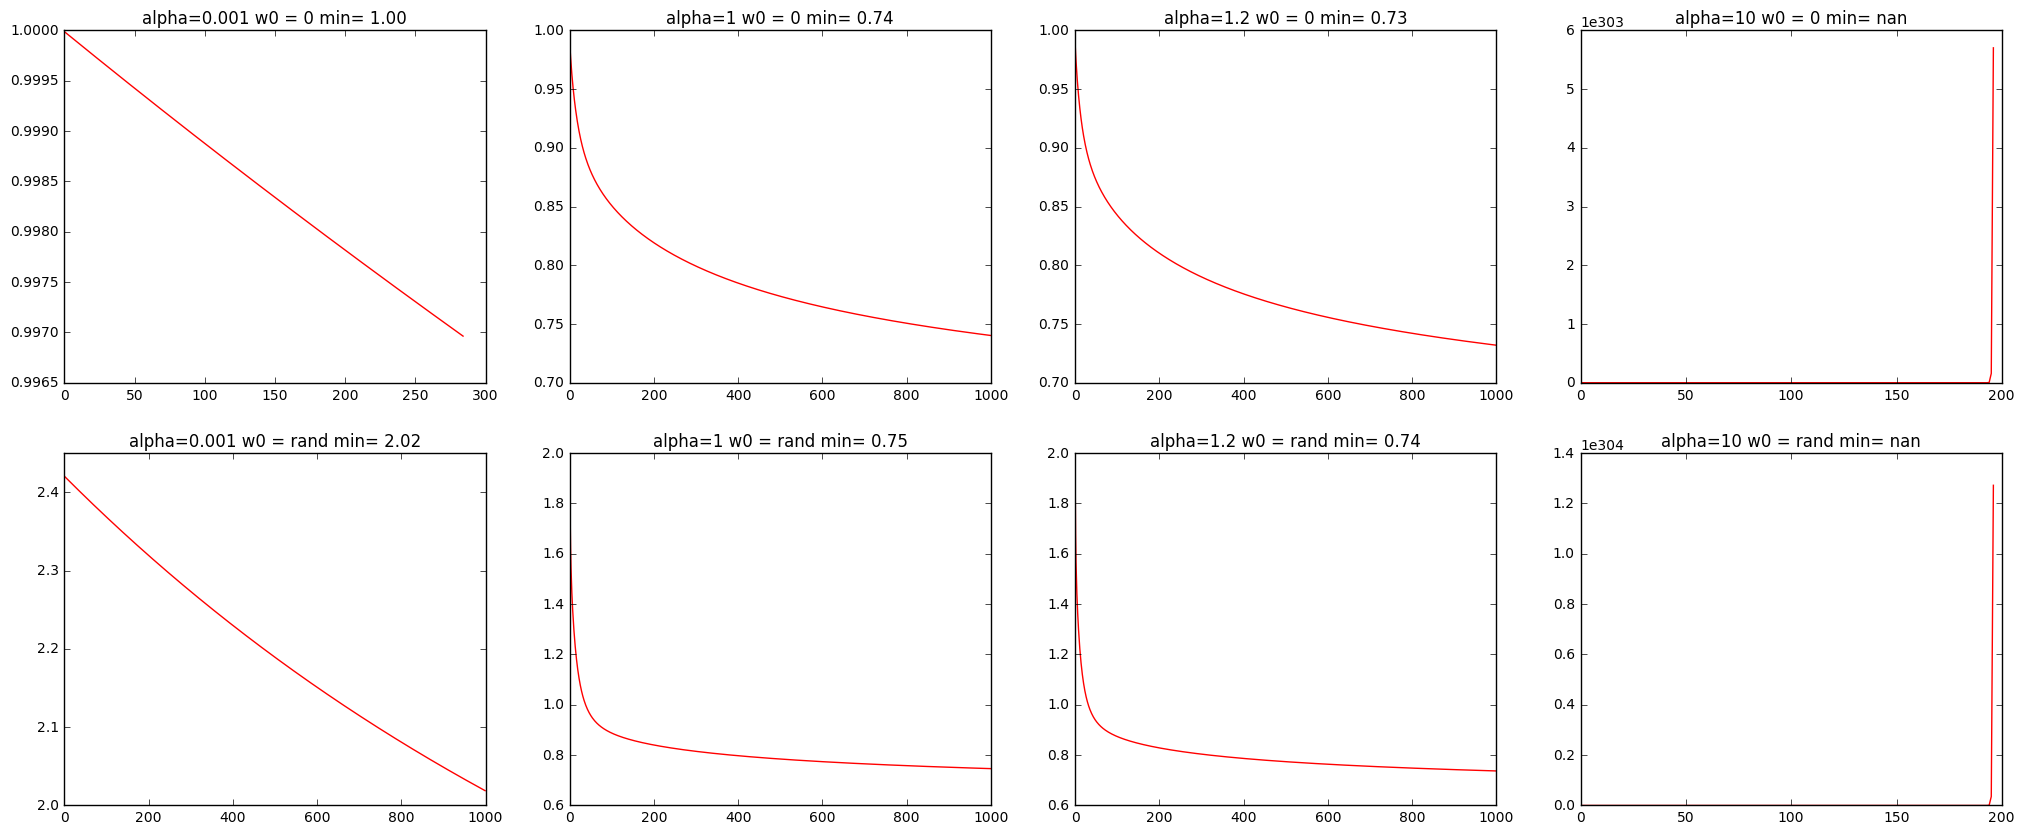

In [501]:
fig = plt.figure(figsize=(25,10))
for i, alpha in enumerate([0.001, 1, 1.2, 10, 0.001, 1, 1.2, 10]):   
    ax = fig.add_subplot(2, 4, i+1)
    if i < 4:
        w_opt, Loss = grad_descent(X_trainred, y_trainred, np.zeros(X_trainred.shape[1]), alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " w0 = 0" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")
    else: 
        w_opt, Loss = grad_descent(X_trainred, y_trainred, w0red , alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " w0 = rand" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")

**Выводы:**
- шаг и инициализация весов влияют на сходимость
- в случае, когда начальная инициализация весов $w$ - нули, при достаточно малых значениях $\alpha = 0.001$ сходимость алгоритма происходит крайне медленно, однако при достаточно больших значениях $\alpha = 10.0$ алгоритм не сходится вообще (расходится), что видно в увеличении значения функционала потерь с ростом итерации. По графикам можно сделать вывод, что оптимальное значение $\alpha \in [1.5, 2]$
- в случае, когда начальная инициализация весов $w$ происходит случайно из $U \sim [0,1]$, сходимость алгоритма зависит от $\alpha$ так же, как и в первом случае. Но случайные веса все же влияют на сходимость алгоритма: при $\alpha \approx 1$ алгоритм сходится к тысячной итерации к тому же значению функционала, что и при нулевой инициализации. При $\alpha << 1$ алгоритм сходится намного хуже чем в первом случае, так как скорость сходимости ниже и алгоритм не успевает сходиться за указанное кол-во итераций. При $\alpha >> 1$ алгоритм расходится, как и в первом случае.

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

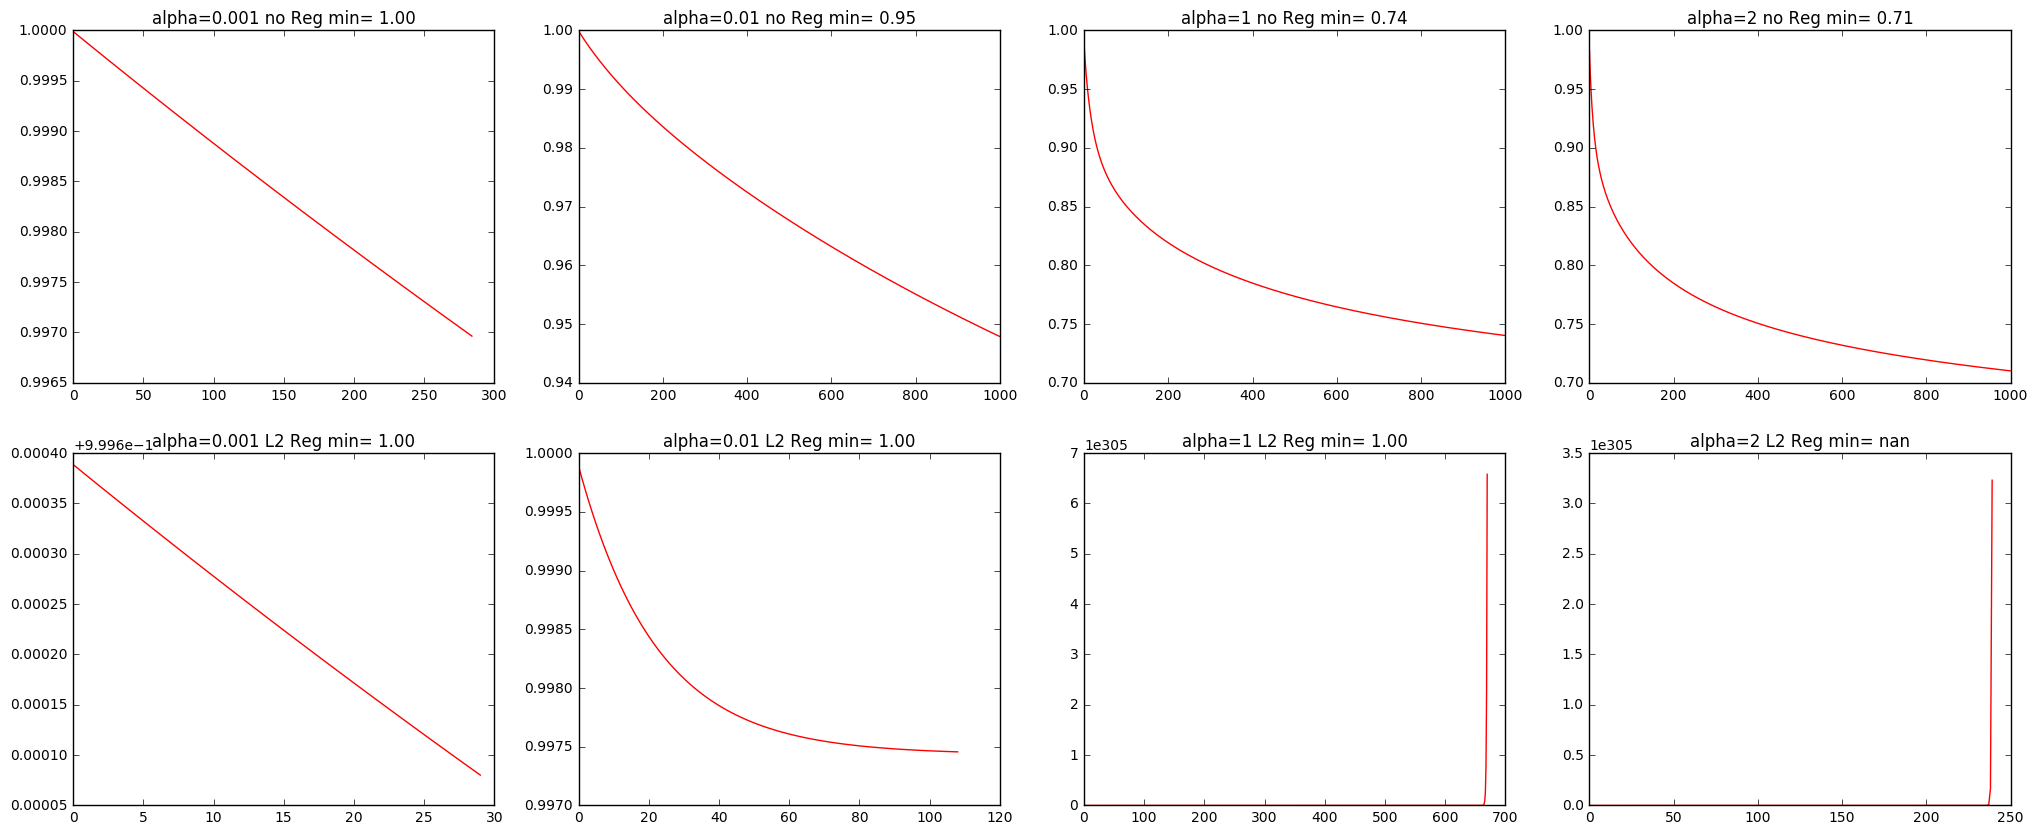

In [502]:
fig = plt.figure(figsize=(25,10))
for i, alpha in enumerate([0.001, 0.01, 1, 2, 0.001, 0.01, 1, 2]):   
    ax = fig.add_subplot(2, 4, i+1)
    if i < 4:
        w_opt, Loss = grad_descent(X_trainred, y_trainred, np.zeros(X_trainred.shape[1]), alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " no Reg" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")
    else: 
        w_opt, Loss = grad_descent(X_trainred, y_trainred, np.zeros(X_trainred.shape[1]) , alpha, 1000, 0.0001, True)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " L2 Reg" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")

**Выводы:**
- Регуляризация значительно влияет на сходимость алгоритма 
- регуляризованный алгоритм для сходимости должен принимать меньшие значения $\alpha$ (в противном случае алгоритм расходится)
- если сравнивать регуляризованный алгоритм и алгоритм без регуляризации, при равных значениях $\alpha$, при которых оба алгоритма сходятся, регуляризованный алгоритм сходится быстрее. Например, при $\epsilon = 0.0001$ регуляризованный алгоритм сходится в среднем за 250 итераций (в зависимости от $\alpha$), алгоритм без регуляризации сходится более чем за 1000 итераций. 
- Возможно, регуляризация снижает разброс значений коэффициентов, что ускоряет сходимость алгоритма

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [ ]:
# Your code here